In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

In [2]:
file_path = r"C:\Users\krush\OneDrive\Desktop\project 3\Data\prediction_data.xlsx"

train_sheet = 'chrun vw_churndata'
predict_sheet = 'chrun vw_joindata'


In [3]:
data = pd.read_excel(
    file_path,
    sheet_name=[train_sheet, predict_sheet]
)

train_data = data[train_sheet]
predict_data = data[predict_sheet]

print(train_data.head())
print(predict_data.head())


  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   11098-MAD  Female   30     Yes  Madhya Pradesh                    0   
1   11114-PUN    Male   51      No          Punjab                    5   
2   11167-WES  Female   43     Yes     West Bengal                    3   
3   11179-MAH    Male   35      No     Maharashtra                   10   
4   11180-TAM    Male   75     Yes      Tamil Nadu                   12   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                31     Deal 1           Yes             No  ...   
1                 9     Deal 5           Yes             No  ...   
2                28     Deal 1           Yes            Yes  ...   
3                12        NaN           Yes             No  ...   
4                27     Deal 2           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal          95.10       6683.40          0.00   
1  Bank Wi

In [4]:
# Drop unused columns
train_data = train_data.drop(
    ['Customer_ID', 'Churn_Category', 'Churn_Reason'],
    axis=1
)

# Categorical columns
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service',
    'Multiple_Lines', 'Internet_Service', 'Internet_Type',
    'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
    'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract',
    'Paperless_Billing', 'Payment_Method'
]


In [5]:
label_encoders = {}
 
for col in columns_to_encode:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    label_encoders[col] = le


In [6]:
train_data['Customer_Status'] = train_data['Customer_Status'].map({
    'Stayed': 0,
    'Churned': 1
})


In [7]:
X = train_data.drop('Customer_Status', axis=1)
y = train_data['Customer_Status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [8]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight='balanced'
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

In [9]:
y_pred = rf_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[818  37]
 [146 201]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       855
           1       0.84      0.58      0.69       347

    accuracy                           0.85      1202
   macro avg       0.85      0.77      0.79      1202
weighted avg       0.85      0.85      0.84      1202



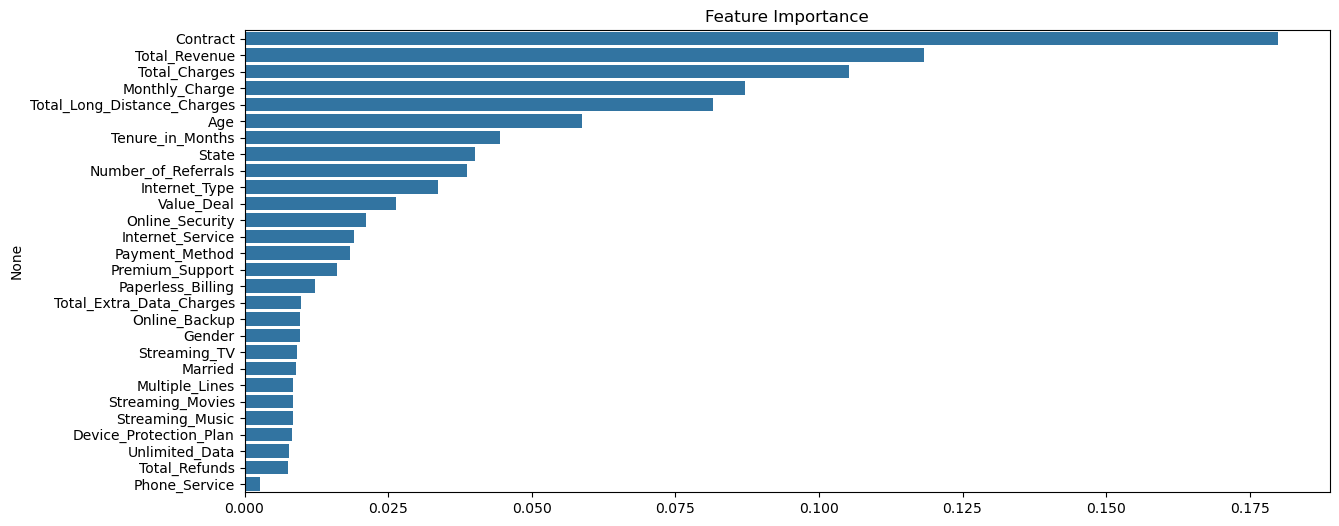

In [10]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(14, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title("Feature Importance")
plt.show()


In [11]:
original_data = predict_data.copy()
customer_ids = predict_data['Customer_ID']

predict_data = predict_data.drop(
    ['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'],
    axis=1
)


In [12]:
for col in columns_to_encode:
    predict_data[col] = label_encoders[col].transform(predict_data[col])


In [13]:
predictions = rf_model.predict(predict_data)

original_data['Customer_Status_Predicted'] = predictions


In [14]:
churned_customers = original_data[
    original_data['Customer_Status_Predicted'] == 1
]


In [15]:
output_path = r"C:\Users\krush\OneDrive\Desktop\project 3\Predictions1.csv"
churned_customers.to_csv(output_path, index=False)

print("✅ Prediction file saved successfully")


✅ Prediction file saved successfully
